In [1]:
from Lecture5 import Node, Binomial_Tree
import numpy as np
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
from importlib import reload  
from scipy.stats import norm
from scipy import optimize
import random 

In [2]:
#lecture 5 slide 12/36:
tree = Binomial_Tree(S = 20, T = 0.25, o = 0.3, n = 500)  
print(tree.present_value(K = 21, r = 0.12))



1.027245341113353


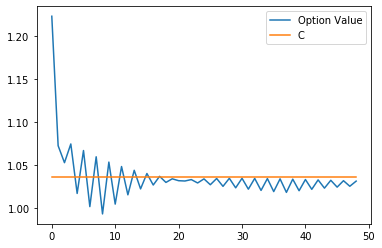

In [3]:
# Visualize process of slide 16/36 by changing n
values = []
for n in range(1,50,1):
    tree = Binomial_Tree(S = 20, T = 0.25, o = 0.3, n = n)  
    values.append(tree.present_value(K = 21, r = 0.12))

pd.DataFrame({'Option Value': values, 'C':sum(values)/len(values)}).plot()

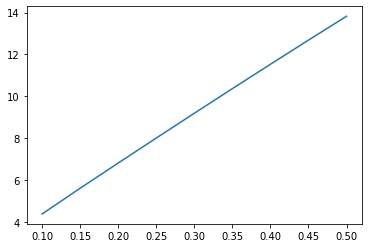

In [4]:
# Visualize changing volatility like in slide 20/36
values = []
vols = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
for vol in vols:
    tree = Binomial_Tree(S = 50, T = 2, o = vol, n = 2)  
    values.append(tree.present_value(K = 52, r = 0.05))
pd.Series(values, index = vols).plot()

# Could plot some nice 3D stuff here...

In [5]:
# American put from slide 24/36
tree = Binomial_Tree(S = 50, T = 5/12, o = 0.4, n = 3)  
print(tree.present_value(K = 50, r = 0.1, call = False, european = False))
# Compare to european:
print(tree.present_value(K = 50, r = 0.1, call = False, european = True))

4.644075163144819
4.482723705669118


In [6]:
# Continuous dividend from slide 26/36
growth_params = {'underlying': 'cont_div_stock', 'q': 0.04}
tree.present_value(K = 50, r = 0.1, call = False, european = False, **growth_params)

4.941715964764493

In [7]:
### LECTURE 6 ####
from scipy.stats import norm
import Lecture6 
reload(Lecture6)
from Lecture6 import brownian_motion, montecarlo

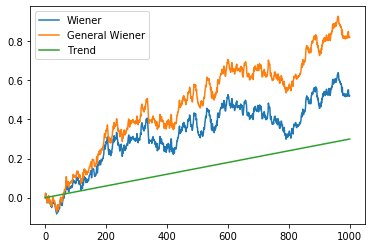

In [8]:
T = 2
N = 1000
vol = 0.3

# Wiener processes like 36/56
brownian_motion(T, N, vol, seed = 1, origin = 0)

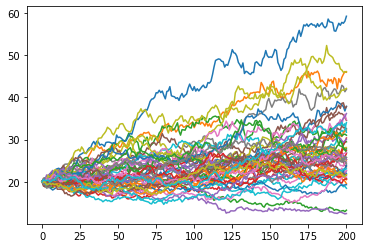

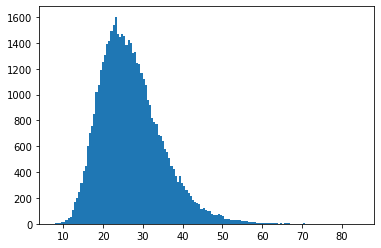

In [9]:
# Montecarlo
mu = 0.15
vol = 0.2
N = 200
T = 2
r = 0.15
S = 20
K = 21

# Like results in slide 51/56
mc = montecarlo(mu, vol, T, r)


# First, two hundred step simulation
mc.plot_step_simulation(S, N)

# Now, thousand times more with one time step.
mc.plot_one_step(S)

In [10]:
# so according to montecarlo (slide 48/56)
print(mc.present_value(S, K))

# Compare to binomial tree. Note that to get same results, need r to equal mu
tree = Binomial_Tree(S, T, vol, 17)  
print(tree.present_value(K, r))

4.948397429215785
4.924468255992509


In [11]:
# Puts?
print(mc.present_value(S, K, call = False))

# Compare to binomial tree. Note that to get same results, need r to equal mu
tree = Binomial_Tree(S, T, vol, 50)  
print(tree.present_value(K, r, call = False))

0.5006507763410398
0.5061983603978087


In [12]:
### LECTURE 7 #####
import Lecture7
reload(Lecture7)
from Lecture7 import black_scholes,historic_volatility,implied_volatility

In [13]:
#Slide 3/43

# Montecarlo
mu = 0.13
vol = 0.2

T = 20/52
r = 0.05
S = 49
K = 50

# According to montecarlo
mc = montecarlo(mu, vol, T, r)
print(mc.present_value(S, K))
# So receiving 3 per option... bad deal I guess?


3.2806776678160627


In [14]:
# above according to black scholes (because drift factor not present?)
print(black_scholes(S, K, vol, r, T))

2.4005273232717137


In [15]:
# slide 24/43
S = 30
K = 29
vol = 0.25
r = 0.05
mu = r
T = 4/12

#call
print(black_scholes(S, K, vol, r, T))
#put
print(black_scholes(S, K, vol, r, T, call = False))

2.5251469666999995
1.045819127526908


In [16]:
# Implied volatility from slide 28/43
price =1.875
S = 21
K = 20
r = 0.1 
T = 0.25

implied_volatility(price, S, K, r, T)

0.23451290662982638

In [17]:
# Exercise on slide 43/43
S = 100 
vol = 0.2
T = 1
K = 100
r = 0.07
mu = r
n = [2,3,500]

bs = black_scholes(S, K, vol, r, T)
print(bs)

mc = montecarlo(mu, vol, T, r)
print(mc.present_value(S, K, n_sim = 100000))

bt = []
for i in n:
    tree = Binomial_Tree(S, T, vol, i)  
    bt.append(tree.present_value(K, r))

print(bt)

11.541470170672412
11.537284041825547
[10.617847147540248, 12.068880425017628, 11.537412251593102]


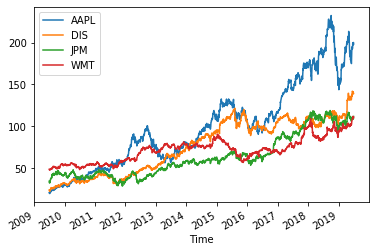

In [19]:
# Read data
def read_daily_stock(path,dt = 'Time'):
    s = pd.read_csv(path)
    s.index = pd.to_datetime(s[dt])
    return s.resample('D').mean().dropna().Last

options = pd.read_csv("Data/options.csv")
options.date = pd.to_datetime(options.date)
options = options[options.date > pd.to_datetime("2018-01-01")]
stocks = pd.DataFrame({'AAPL': read_daily_stock("Data/AAPL.csv"),
                       'DIS' : read_daily_stock("Data/DIS.csv"),
                       'JPM' : read_daily_stock("Data/JPM.csv"),
                       'WMT' : read_daily_stock("Data/WMT.csv")})
stocks.plot()

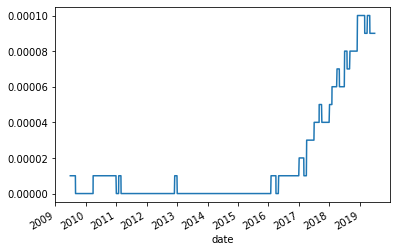

In [20]:
dividends = pd.read_csv("Data/dividend.csv")
dividends.index = pd.to_datetime(dividends.date)
dividends = dividends[['TICKER','DIVAMT']]
risk_free = pd.read_csv("Data/risk-free.csv")
risk_free.index = pd.to_datetime(risk_free.date)
risk_free = risk_free.rf
risk_free.plot()
plt.show()

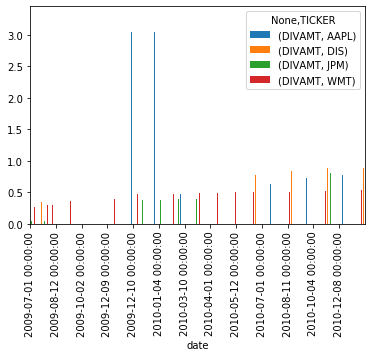

In [21]:
ax = dividends.pivot(columns='TICKER').dropna(how='all').plot(kind='bar')
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 10))
plt.show()

In [22]:
# Create one dataframe with all necessary parameters
options = options.merge(risk_free, how = 'left', left_on = 'date', right_index = True)
options['T'] = (pd.to_datetime(options.exdate) - options.date).dt.days 
options = options.merge(
    pd.melt(stocks.reset_index(), id_vars='Time', var_name='Stock', value_name='Price'),
    how = 'left', left_on = ['date','ticker'], right_on = ['Time','Stock'])
del options['Stock']
options['midpoint'] = (options.best_bid + options.best_offer)/2

#convert dividend to continous rate in option pricing
yearly_div = dividends.resample("Y").sum()
yearly_div['year'] = yearly_div.index.year
options['year'] = options.date.dt.year
options = options.merge(yearly_div, how = 'left', on = 'year')

options['q'] = np.log(1+options.DIVAMT/options.Price)
options.head()
options.head()

,date,exdate,cp_flag,strike_price,best_bid,best_offer,impl_volatility,forward_price,ticker,exercise_style,rf,T,Time,Price,midpoint
0,2018-01-02,2018-01-05,C,170000,2.47,2.51,0.152013,172.281244,AAPL,A,0.00005,3,2018-01-02,171.556596,2.490
1,2018-01-02,2018-01-05,C,172500,0.82,0.84,0.150026,172.281244,AAPL,A,0.00005,3,2018-01-02,171.556596,0.830
2,2018-01-02,2018-01-05,C,175000,0.17,0.18,0.158588,172.281244,AAPL,A,0.00005,3,2018-01-02,171.556596,0.175
3,2018-01-02,2018-01-05,C,177500,0.04,0.05,0.185697,172.281244,AAPL,A,0.00005,3,2018-01-02,171.556596,0.045
4,2018-01-02,2018-01-05,C,180000,0.02,0.03,0.231942,172.281244,AAPL,A,0.00005,3,2018-01-02,171.556596,0.025


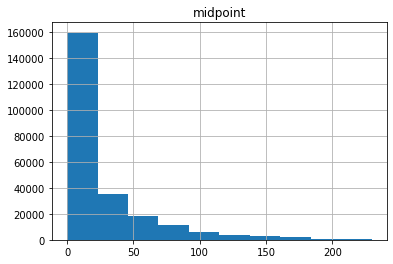

In [23]:
s = options.loc[(options.ticker == "AAPL") & (options.cp_flag == "C"),["midpoint"]].hist()

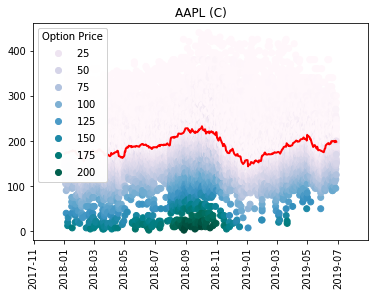

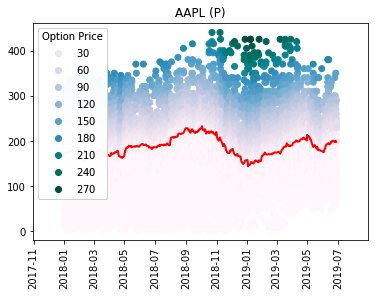

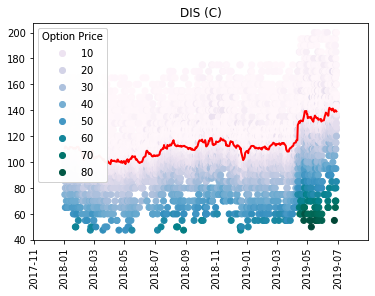

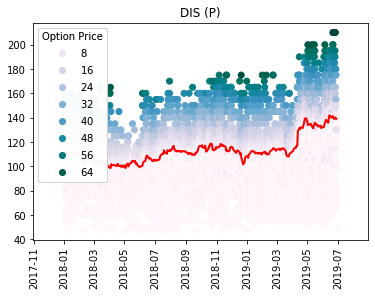

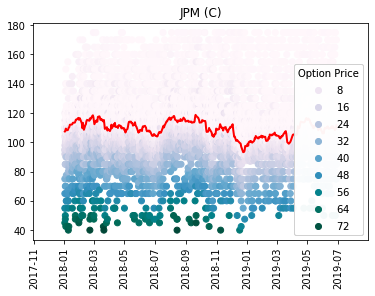

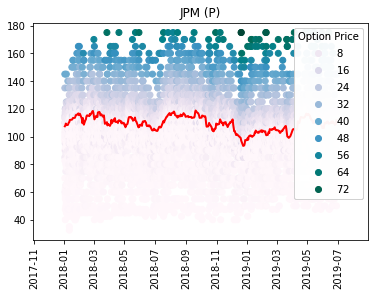

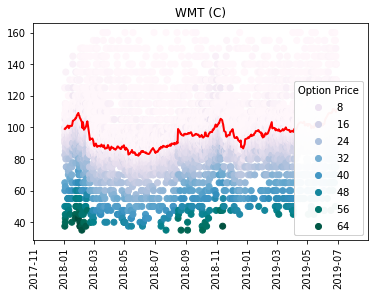

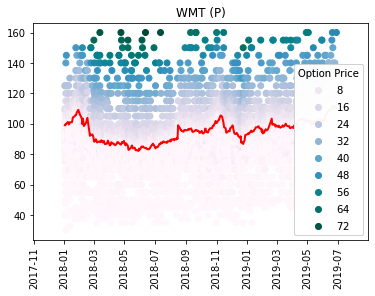

In [101]:
for t in ["AAPL","DIS","JPM","WMT"]:
    for f in ["C","P"]:
        s = options.loc[(options.ticker == t) & (options.cp_flag == f),["date", "strike_price","Price","midpoint"]]
        s = s.iloc[np.sort(random.sample(range(1, len(s)), int(len(s)/20))),:]
        s = s.sort_values(by='date', ascending=True)
        s.index = s.date
        
        fig, ax = plt.subplots()
        
        scatter = ax.scatter(s.index,s['strike_price']/1000,zorder = 1, c = s.midpoint, cmap='PuBuGn')
        legend1 = ax.legend(*scatter.legend_elements(), title="Option Price")
        ax.add_artist(legend1)
        ax.plot(s['Price'],zorder=2, color = 'r', linewidth=2.0) 
        plt.title(t + " (" + f +")")
        plt.xticks(rotation='vertical')
        plt.show()
        


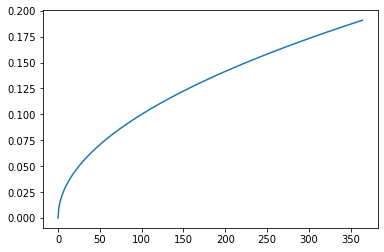

In [159]:
# Let's not consider options that are too far out of the money. Make it a function of the number of days that are still left
time_cutoff = lambda x: np.sqrt(x)/100
plt.plot(range(365), time_cutoff(range(365)))
rowsbefore = len(options)
options = options[(np.abs(options.strike_price-options.Price*1000)/options.strike_price)<(np.sqrt(options['T'])/100)]
print("Reduce options from {before} observations to just {after}".format(before = rowsbefore, after = len(options)))



In [26]:
pd.options.mode.chained_assignment = None  # default='warn'
def get_expected_divs(ticker, t, T):
    out = dividends.loc[(dividends.index >t) & (dividends.index <T) & (dividends.TICKER == ticker),:]
    out['days'] = (out.index - t).days
    return out

In [200]:
%load_ext autoreload
%autoreload 2
# Will now use https://github.com/shashank-khanna/Option-Pricing
from github.option_pricing.american_option_pricing import AmericanOptionPricing


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
# Let's try to price american options with monte carlo simulations. Will take 50 random rows from the data
test_idx = random.sample(range(1, len(options)), 50)

In [239]:
#Monte carlo simulations
for row in options.iloc[test_idx,:].iterrows():
    row = row[1]
    S = row['Price']
    K = row['strike_price']/1000
    #vol = 0.25
    rf = row['rf']
    mu = rf
    T = row['T']
    ticker = row['ticker']
    price = row['midpoint']
    q = row['q']
    data =pd.DataFrame({'Close':stocks[ticker][stocks.index<=row['date']]})
    data.index = data.index.rename('Date')
    #divs = get_expected_divs(ticker,row['date'],pd.to_datetime(row['exdate']))

    a = AmericanOptionPricing(ticker,data,pd.to_datetime(row['date']),pd.to_datetime(row['exdate']),K,q)
    a.risk_free_rate = rf
    cp = 0 if row['cp_flag'] == "C" else 1
    print(a.spot_price)
    print("---------")
    print("{ticker} {cp} with strike {K} and days to maturity {T} with spot {S} at time {date}".format(
        ticker = ticker, cp = "call" if cp ==0 else "put", K = K, T=T, S = S,date = row['date']))
    print("With calculated vol of {vol} :  {c}".format(vol = round(a.volatility,3), c = round(a.calculate_option_prices()[cp],2)))
    a.volatility = row['impl_volatility']
    print("With an implied vol of {vol} :  {c}".format(vol = round(a.volatility,3), c = round(a.calculate_option_prices()[cp],2)))
    print("Actual obbserved call midpoint:  " + str(round(row['midpoint'],2)))

95.93171481481482
---------
WMT put with strike 97.5 and days to maturity 28 with spot 95.93171481481482 at time 2018-09-21 00:00:00
With calculated vol of 0.158 :  2.9
With an implied vol of 0.186 :  3.13
Actual obbserved call midpoint:  2.8
110.83551111111112
---------
JPM call with strike 125.0 and days to maturity 220 with spot 110.83551111111112 at time 2019-06-11 00:00:00
With calculated vol of 0.229 :  2.51
With an implied vol of 0.191 :  1.36
Actual obbserved call midpoint:  1.88
89.16497037037037
---------
WMT put with strike 90.5 and days to maturity 8 with spot 89.16497037037037 at time 2018-08-09 00:00:00
With calculated vol of 0.155 :  1.76
With an implied vol of 0.365 :  2.65
Actual obbserved call midpoint:  2.75
98.91574074074073
---------
JPM call with strike 105.0 and days to maturity 72 with spot 98.91574074074073 at time 2019-01-02 00:00:00
With calculated vol of 0.231 :  1.58
With an implied vol of 0.244 :  1.76
Actual obbserved call midpoint:  2.04
185.497425925925

In [76]:
#call, put = a.calculate_option_prices()
#parity = a.is_call_put_parity_maintained(call, put)
#print("Parity = %s" % parity)

Parity = True


In [213]:
# Machine learning pricing
# based on https://srdas.github.io/DLBook/DeepLearningWithPython.html

import pylab
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
from keras import backend

# only look at calls for now and normalize data
df = options[options.cp_flag == "C"].copy()
df["strike_price"] = df["strike_price"] /1000
## Normalize the data exploiting the fact that the BS Model is linear homogenous in S,K
df["Price"] = df["Price"]/df["strike_price"]
df["midpoint"] = df["midpoint"]/df["strike_price"]
df["T"] = df["T"] / 365
df.head()

In [216]:
# Split into train and test
n = len(df)
n_train =  (int)(0.8 * n)
train = df[0:n_train]
X_train = train[['Price', 'T', 'q', 'impl_volatility', 'rf']].values
y_train = train['midpoint'].values
test = df[n_train+1:n]
X_test = test[['Price', 'T', 'q', 'impl_volatility', 'rf']].values
y_test = test['midpoint'].values

In [219]:
# Neural network

def custom_activation(x):
    return backend.exp(x)

nodes = 120
model = Sequential()

model.add(Dense(nodes, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(nodes, activation='elu'))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation(custom_activation))
          
model.compile(loss='mse',optimizer='rmsprop')

In [220]:
# fit the model
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=2)

Train on 143154 samples, validate on 15907 samples
Epoch 1/10
 - 6s - loss: 0.0019 - val_loss: 7.3315e-05
Epoch 2/10
 - 5s - loss: 3.1556e-04 - val_loss: 2.8783e-04
Epoch 3/10
 - 6s - loss: 2.6300e-04 - val_loss: 4.6395e-05
Epoch 4/10
 - 6s - loss: 2.2832e-04 - val_loss: 3.9490e-04
Epoch 5/10
 - 5s - loss: 2.0482e-04 - val_loss: 1.0874e-04
Epoch 6/10
 - 5s - loss: 1.8422e-04 - val_loss: 5.5524e-05
Epoch 7/10
 - 5s - loss: 1.6934e-04 - val_loss: 8.7284e-05
Epoch 8/10
 - 5s - loss: 1.5715e-04 - val_loss: 1.1701e-04
Epoch 9/10
 - 5s - loss: 1.4664e-04 - val_loss: 1.0894e-04
Epoch 10/10
 - 5s - loss: 1.3628e-04 - val_loss: 3.4629e-05


In [234]:
import matplotlib as mpl
def CheckAccuracy(y,y_hat):
    stats = dict()
    
    stats['diff'] = y - y_hat
    
    stats['mse'] = np.mean(stats['diff']**2)
    print("Mean Squared Error:      ", stats['mse'])
    
    stats['rmse'] = np.sqrt(stats['mse'])
    print("Root Mean Squared Error: ", stats['rmse'])
    
    stats['mae'] = np.mean(abs(stats['diff']))
    print("Mean Absolute Error:     ", stats['mae'])
    
    stats['mpe'] = np.sqrt(stats['mse'])/np.mean(y)
    print("Mean Percent Error:      ", stats['mpe'])
    
    #plots
    mpl.rcParams['agg.path.chunksize'] = 100000
    plt.figure(figsize=(14,10))
    plt.scatter(y, y_hat,color='black',linewidth=0.3,alpha=0.4, s=0.5)
    plt.xlabel('Actual Price',fontsize=20,fontname='Times New Roman')
    plt.ylabel('Predicted Price',fontsize=20,fontname='Times New Roman') 
    plt.show()
    
    plt.figure(figsize=(14,10))
    plt.hist(stats['diff'], bins=50,edgecolor='black',color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()
    
    return stats

Mean Squared Error:       2.734992671375297e-05
Root Mean Squared Error:  0.0052297157392876496
Mean Absolute Error:      0.0036396869596043344
Mean Percent Error:       0.08377845783256185


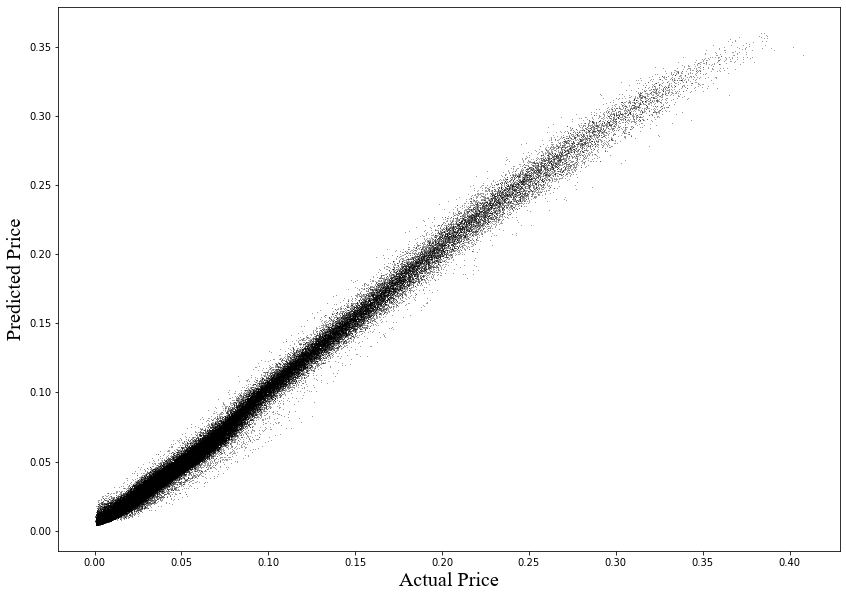

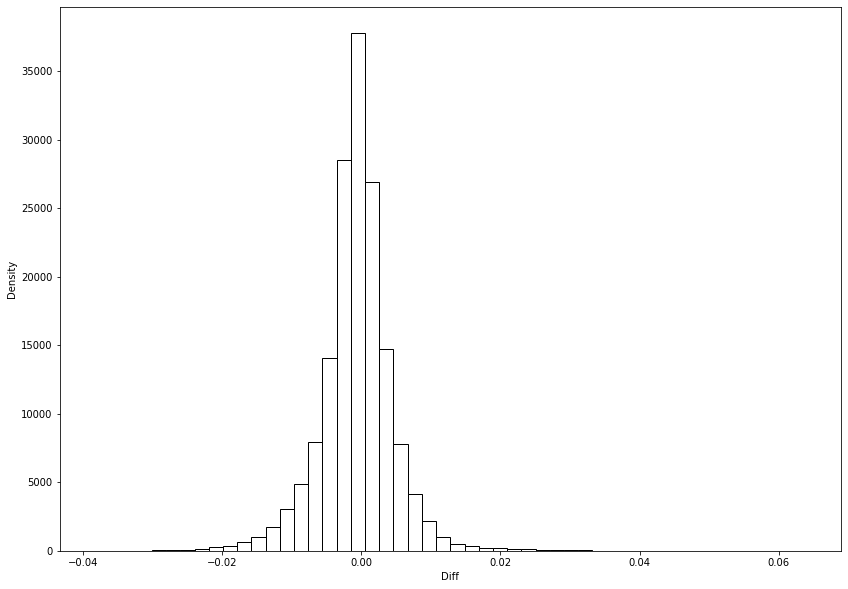

{'diff': array([ 0.00183383, -0.00387333,  0.00586986, ..., -0.00152699,
        -0.00181997,  0.00657868]),
 'mse': 2.734992671375297e-05,
 'rmse': 0.0052297157392876496,
 'mae': 0.0036396869596043344,
 'mpe': 0.08377845783256185}

In [236]:
#in sample performance
y_train_hat = model.predict(X_train)
y_train_hat = np.squeeze(y_train_hat)
CheckAccuracy(y_train, y_train_hat)

Mean Squared Error:       2.0602940152196762e-05
Root Mean Squared Error:  0.004539046172071481
Mean Absolute Error:      0.0032982569381173423
Mean Percent Error:       0.08462470109262245


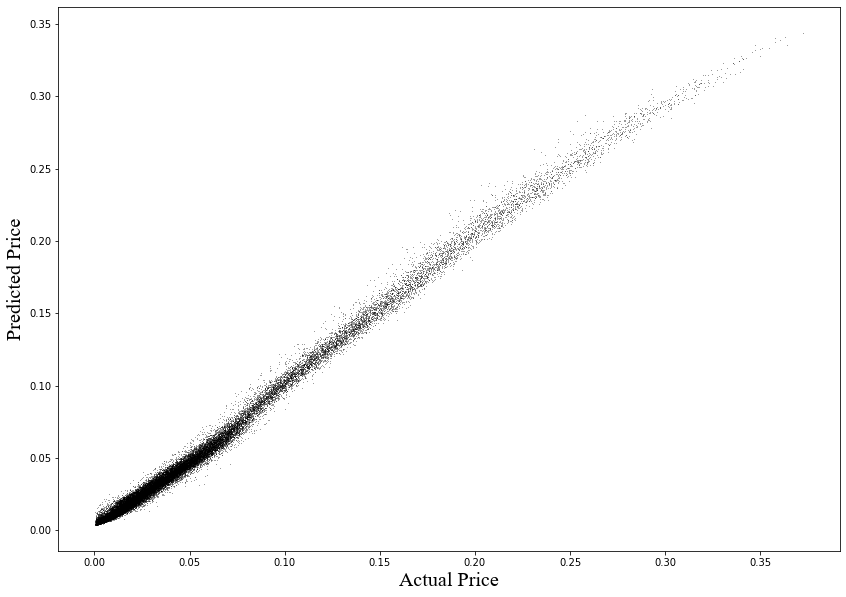

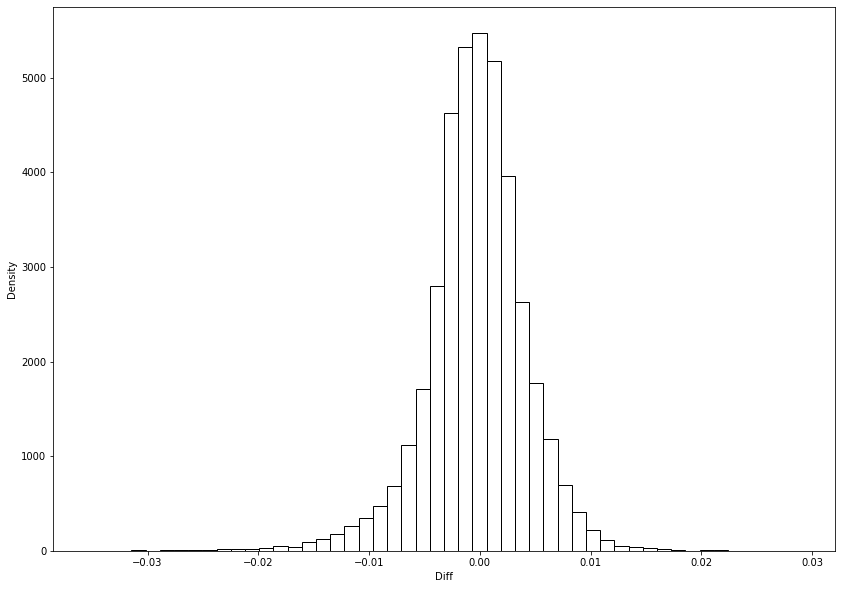

{'diff': array([ 0.00282846,  0.00204686,  0.00102143, ..., -0.01187789,
        -0.01511093, -0.02085912]),
 'mse': 2.0602940152196762e-05,
 'rmse': 0.004539046172071481,
 'mae': 0.0032982569381173423,
 'mpe': 0.08462470109262245}

In [238]:
#out of sample performance
y_test_hat = model.predict(X_test)
y_test_hat = np.squeeze(y_test_hat)
CheckAccuracy(y_test, y_test_hat)